In [2]:
import os
import pandas as pd
import tensorflow as tf
import subprocess
import pickle
import datetime
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from train import train_lnphi


In [3]:
# Load and prepare training data
LNPHI_PATH = r"E:\Datasets"
log_save_dir = r"C:\Users\win7\Desktop\logs"
tr = train_lnphi()
tr.load_lnphi_data(LNPHI_PATH)
tr.lnphi_range(-10, 10)
tr.split_data()
tr.feature_eng()

Loading done. Shape: (99880000, 5)
Drop lnphi out of range done. Shape: (53778477, 5)
Splitting done.
Feature Eng done.


In [4]:
list(tr.X_train)

['a_mix', 'b_mix', 'b_i', 'sum']

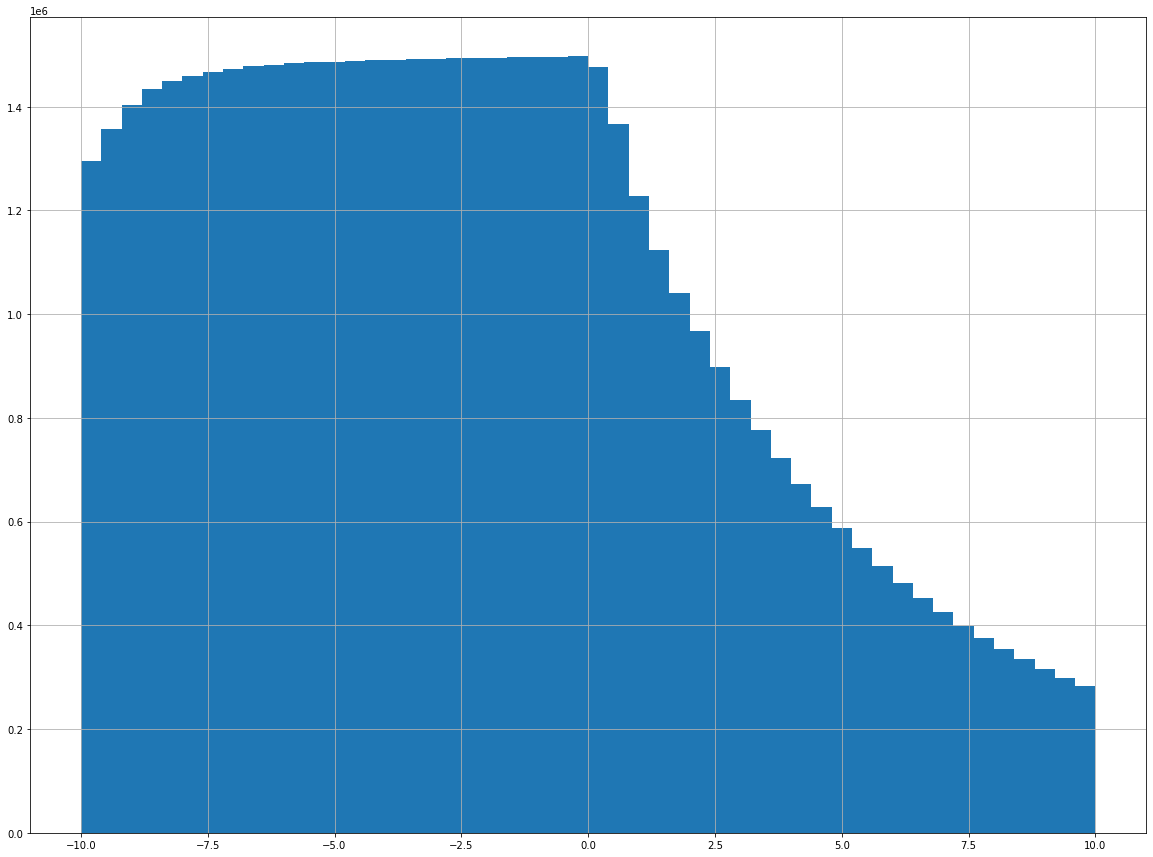

In [5]:
tr.lnphi['lnphi'].hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# Note: Histogram may have empty bins. This is an effect of bin resolution, and does not necessarily mean
# the distribution has a gap.
import matplotlib.pyplot as plt
d = pd.DataFrame(tr.X_train, columns=list(tr.X_train))
d.hist(bins=100, figsize=(20,15))
plt.show()

In [ ]:
d.describe()

In [ ]:
import matplotlib.pyplot as plt
d2 = pd.DataFrame(tr.X_train_prepared, columns=list(tr.X_train))
d2.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
'''d2.describe()'''

In [ ]:

d3 = pd.DataFrame(tr.y_train_prepared)
d3.hist(bins=500, figsize=(20,15))
plt.show()

In [ ]:
d3.describe()

In [ ]:
'''# Load model
tr.model = tf.keras.models.load_model(
    r'C:\Users\win7\Desktop\logs\logs\scalars\norm_all_512_3_40_50_20200808-144642\norm_all_4096_3_40_250_20200810-195701')
# Give existing log directory
tr.logdir = r'C:\Users\win7\Desktop\logs\logs\scalars\norm_all_512_3_40_50_20200808-144642'
tr.model.summary()'''


In [7]:
# Train
name_prefix = 'lnphi_-10-10_single_positive_roots_'
batch_size = 1024
n_layers = 3
n_nodes = 40
epochs = 200
initial_epoch = 49 # 0 if new model

#tr.model_construct(n_layers, n_nodes)
#tr.logdir = r'C:\Users\win7\Desktop\logs\logs\scalars\Liquid_Root__512_3_40_50_20200820-135819'
tr.train_model(batch_size, n_layers, n_nodes, epochs, initial_epoch, log_save_dir, name_prefix)

Train on 34418224 samples, validate on 8604557 samples
Epoch 50/200

Epoch 00050: mse improved from inf to 0.00003, saving model to C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_-10-10_single_positive_roots__512_3_40_50_20200821-191238
INFO:tensorflow:Assets written to: C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_-10-10_single_positive_roots__512_3_40_50_20200821-191238\assets
34418224/34418224 - 84s - loss: 2.8597e-05 - mse: 2.8597e-05 - mae: 0.0027 - mean_absolute_percentage_error: 6.4482 - val_loss: 3.0183e-05 - val_mse: 3.0183e-05 - val_mae: 0.0030 - val_mean_absolute_percentage_error: 8.3310
Epoch 51/200

Epoch 00051: mse did not improve from 0.00003
34418224/34418224 - 80s - loss: 2.8615e-05 - mse: 2.8615e-05 - mae: 0.0027 - mean_absolute_percentage_error: 6.3395 - val_loss: 2.5921e-05 - val_mse: 2.5921e-05 - val_mae: 0.0025 - val_mean_absolute_percentage_error: 5.8082
Epoch 52/200

Epoch 00052: mse did not improve from 0.00003
34418224/34418224 - 77s - loss: 2.8914e-05 - mse


Epoch 00070: mse did not improve from 0.00003
34418224/34418224 - 83s - loss: 2.6909e-05 - mse: 2.6909e-05 - mae: 0.0027 - mean_absolute_percentage_error: 6.1043 - val_loss: 5.2909e-05 - val_mse: 5.2909e-05 - val_mae: 0.0036 - val_mean_absolute_percentage_error: 7.4511
Epoch 71/200

Epoch 00071: mse improved from 0.00003 to 0.00003, saving model to C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_-10-10_single_positive_roots__512_3_40_50_20200821-191238
INFO:tensorflow:Assets written to: C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_-10-10_single_positive_roots__512_3_40_50_20200821-191238\assets
34418224/34418224 - 84s - loss: 2.6691e-05 - mse: 2.6691e-05 - mae: 0.0026 - mean_absolute_percentage_error: 6.3176 - val_loss: 2.0737e-05 - val_mse: 2.0737e-05 - val_mae: 0.0026 - val_mean_absolute_percentage_error: 6.1716
Epoch 72/200

Epoch 00072: mse improved from 0.00003 to 0.00003, saving model to C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_-10-10_single_positive_roots__512_3_40_50_20

INFO:tensorflow:Assets written to: C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_-10-10_single_positive_roots__512_3_40_50_20200821-191238\assets
34418224/34418224 - 84s - loss: 2.5388e-05 - mse: 2.5388e-05 - mae: 0.0026 - mean_absolute_percentage_error: 5.9547 - val_loss: 1.7633e-05 - val_mse: 1.7633e-05 - val_mae: 0.0022 - val_mean_absolute_percentage_error: 5.2292
Epoch 90/200

Epoch 00090: mse did not improve from 0.00003
34418224/34418224 - 83s - loss: 2.5735e-05 - mse: 2.5735e-05 - mae: 0.0026 - mean_absolute_percentage_error: 6.0301 - val_loss: 3.0152e-05 - val_mse: 3.0152e-05 - val_mae: 0.0028 - val_mean_absolute_percentage_error: 8.9364
Epoch 91/200

Epoch 00091: mse improved from 0.00003 to 0.00003, saving model to C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_-10-10_single_positive_roots__512_3_40_50_20200821-191238
INFO:tensorflow:Assets written to: C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_-10-10_single_positive_roots__512_3_40_50_20200821-191238\assets
34418224/344

Epoch 112/200

Epoch 00112: mse did not improve from 0.00002
34418224/34418224 - 75s - loss: 2.4757e-05 - mse: 2.4757e-05 - mae: 0.0025 - mean_absolute_percentage_error: 6.0826 - val_loss: 1.8237e-05 - val_mse: 1.8237e-05 - val_mae: 0.0025 - val_mean_absolute_percentage_error: 6.7716
Epoch 113/200

Epoch 00113: mse improved from 0.00002 to 0.00002, saving model to C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_-10-10_single_positive_roots__512_3_40_50_20200821-191238
INFO:tensorflow:Assets written to: C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_-10-10_single_positive_roots__512_3_40_50_20200821-191238\assets
34418224/34418224 - 77s - loss: 2.4448e-05 - mse: 2.4448e-05 - mae: 0.0025 - mean_absolute_percentage_error: 5.9010 - val_loss: 4.1723e-05 - val_mse: 4.1723e-05 - val_mae: 0.0026 - val_mean_absolute_percentage_error: 5.7015
Epoch 114/200

Epoch 00114: mse did not improve from 0.00002
34418224/34418224 - 76s - loss: 2.4488e-05 - mse: 2.4488e-05 - mae: 0.0025 - mean_absolute_perce

Epoch 136/200

Epoch 00136: mse did not improve from 0.00002
34418224/34418224 - 78s - loss: 2.3668e-05 - mse: 2.3668e-05 - mae: 0.0025 - mean_absolute_percentage_error: 6.0148 - val_loss: 2.2471e-05 - val_mse: 2.2471e-05 - val_mae: 0.0026 - val_mean_absolute_percentage_error: 5.6888
Epoch 137/200

Epoch 00137: mse did not improve from 0.00002
34418224/34418224 - 79s - loss: 2.3548e-05 - mse: 2.3548e-05 - mae: 0.0025 - mean_absolute_percentage_error: 6.0382 - val_loss: 1.9749e-05 - val_mse: 1.9749e-05 - val_mae: 0.0024 - val_mean_absolute_percentage_error: 7.1026
Epoch 138/200

Epoch 00138: mse improved from 0.00002 to 0.00002, saving model to C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_-10-10_single_positive_roots__512_3_40_50_20200821-191238
INFO:tensorflow:Assets written to: C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_-10-10_single_positive_roots__512_3_40_50_20200821-191238\assets
34418224/34418224 - 80s - loss: 2.3452e-05 - mse: 2.3452e-05 - mae: 0.0025 - mean_absolute_perce

Epoch 158/200

Epoch 00158: mse did not improve from 0.00002
34418224/34418224 - 76s - loss: 2.3269e-05 - mse: 2.3269e-05 - mae: 0.0025 - mean_absolute_percentage_error: 5.8248 - val_loss: 1.7477e-05 - val_mse: 1.7477e-05 - val_mae: 0.0023 - val_mean_absolute_percentage_error: 6.8934
Epoch 159/200

Epoch 00159: mse did not improve from 0.00002
34418224/34418224 - 76s - loss: 2.2869e-05 - mse: 2.2869e-05 - mae: 0.0024 - mean_absolute_percentage_error: 5.6142 - val_loss: 1.7798e-05 - val_mse: 1.7798e-05 - val_mae: 0.0019 - val_mean_absolute_percentage_error: 4.5337
Epoch 160/200

Epoch 00160: mse did not improve from 0.00002
34418224/34418224 - 76s - loss: 2.2850e-05 - mse: 2.2850e-05 - mae: 0.0024 - mean_absolute_percentage_error: 5.8854 - val_loss: 1.8472e-05 - val_mse: 1.8472e-05 - val_mae: 0.0020 - val_mean_absolute_percentage_error: 4.5808
Epoch 161/200

Epoch 00161: mse improved from 0.00002 to 0.00002, saving model to C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_-10-10_single_po

34418224/34418224 - 77s - loss: 2.1906e-05 - mse: 2.1906e-05 - mae: 0.0024 - mean_absolute_percentage_error: 6.1126 - val_loss: 2.5585e-05 - val_mse: 2.5585e-05 - val_mae: 0.0024 - val_mean_absolute_percentage_error: 6.2615
Epoch 183/200

Epoch 00183: mse improved from 0.00002 to 0.00002, saving model to C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_-10-10_single_positive_roots__512_3_40_50_20200821-191238
INFO:tensorflow:Assets written to: C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_-10-10_single_positive_roots__512_3_40_50_20200821-191238\assets
34418224/34418224 - 76s - loss: 2.1905e-05 - mse: 2.1904e-05 - mae: 0.0024 - mean_absolute_percentage_error: 5.7252 - val_loss: 4.3842e-05 - val_mse: 4.3842e-05 - val_mae: 0.0043 - val_mean_absolute_percentage_error: 7.7100
Epoch 184/200

Epoch 00184: mse improved from 0.00002 to 0.00002, saving model to C:\Users\win7\Desktop\logs.\logs\scalars\lnphi_-10-10_single_positive_roots__512_3_40_50_20200821-191238
INFO:tensorflow:Assets written 

In [ ]:
tr.logdir